In [47]:
#手写特征图片
from time import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition, manifold,discriminant_analysis, datasets

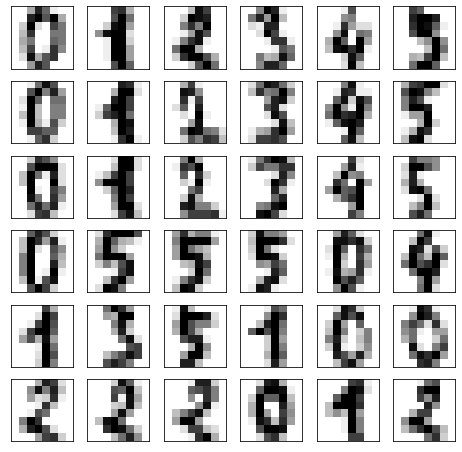

In [48]:
digits=datasets.load_digits(n_class=6)
X=digits.data
y=digits.target
n_samples, n_features=X.shape
fig,axes=plt.subplots(nrows=6,ncols=6,figsize=(8,8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(digits.images[i],cmap=plt.cm.gray_r)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [49]:
def plot_embedding(X,y,plot_title=None):
    plt.figure()#创建画布
    colors=["#FF0000","#E6E61A","#2BD52B","#448CBB","#EE11C2","#778888"]
    for i in range (6):
        plt.scatter(X[y==i,0],X[y==i,1],label=i,c=colors[i])
    plt.legend()
    plt.title(plot_title)


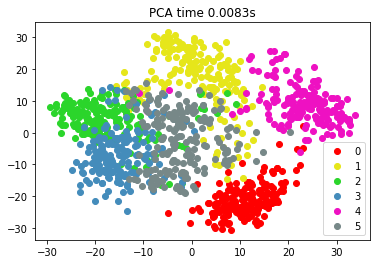

In [50]:
#pca
t0=time()
pca=decomposition.PCA(n_components=2)#降到几维
X_pca=pca.fit_transform(X)
plot_embedding(X_pca,y,'PCA time %.4fs'%(time()-t0))


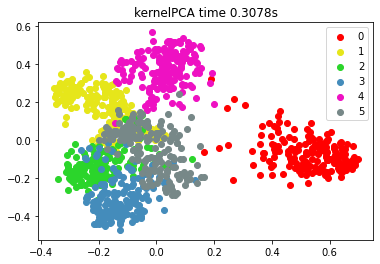

In [5]:
#kernelPCA
t0=time()
kernel_pca=decomposition.KernelPCA(
    n_components=2,kernel='rbf',gamma=1e-3,fit_inverse_transform=True,alpha=5e-3
)
X_kernel_pca=kernel_pca.fit_transform(X)
plot_embedding(X_kernel_pca,y,"kernelPCA time %.4fs"%(time()-t0))

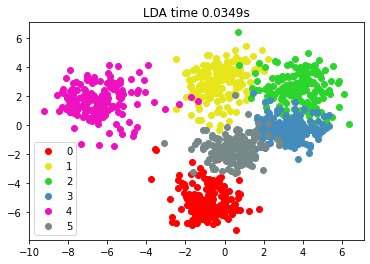

In [51]:
# LDA是有监督
t0=time()
lda=discriminant_analysis.LinearDiscriminantAnalysis(
    n_components=2
)
X_lda=lda.fit_transform(X=X,y=y)
plot_embedding(X_lda,y,"LDA time %.4fs" %(time()-t0))

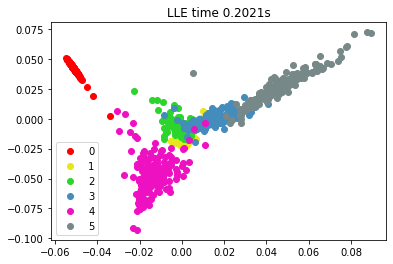

In [14]:
# LLE
t0=time()

LLE=manifold.LocallyLinearEmbedding(n_components=2,n_neighbors=20)
X_LLE=LLE.fit_transform(X)
plot_embedding(X_LLE,y,"LLE time %.4fs" %(time()-t0))


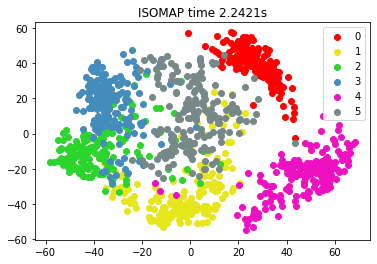

In [52]:
# ISOMAP
t0=time()
ISOMAP=manifold.Isomap(n_components=2,n_neighbors=100)
X_ISOMAP=ISOMAP.fit_transform(X,y)
plot_embedding(X_ISOMAP,y,"ISOMAP time %.4fs" %(time()-t0))


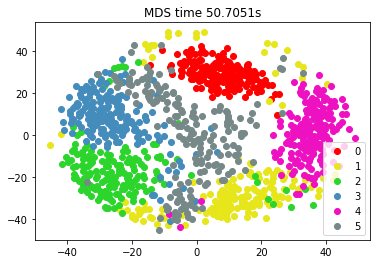

In [53]:
# MDS
t0=time()
MDS=manifold.MDS(n_components=2)
X_MDS=MDS.fit_transform(X,y)
plot_embedding(X_MDS,y,"MDS time %.4fs" %(time()-t0))

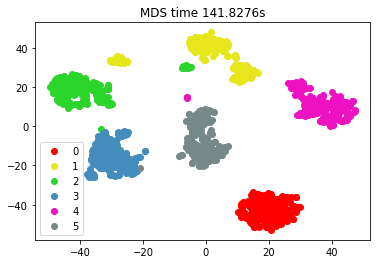

In [20]:
# t-sne
tsme=manifold.TSNE(
    n_components=2,init='pca'
)
X_tsne=tsme.fit_transform(X,y)
plot_embedding(X_tsne,y,"MDS time %.4fs" %(time()-t0))

In [54]:
def plot_3D(points,points_color,title):
    x,y,z=points.T
    fig,ax=plt.subplots(
        figsize=(6,6),
        facecolor='white',
        subplot_kw={'projection':'3d'},
    )
    fig.suptitle(title,size=16)
    col=ax.scatter(x,y,z,c=points_color,s=50)
    ax.view_init(azim=60,elev=9)
    fig.colorbar(col,ax=ax,orientation='horizontal')
    plt.show()


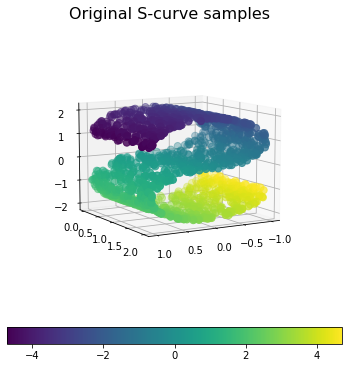

In [55]:
S_points,S_colors=datasets.make_s_curve(1500,random_state=0)
plot_3D(S_points,S_colors,'Original S-curve samples')

In [56]:
def plot_2D(points,points_color,title):
    x,y=points.T
    fig,ax=plt.subplots(
        figsize=(6,6),
        facecolor='white',)
    fig.suptitle(title,size=16)
    col=ax.scatter(x,y,c=points_color,s=50)
    plt.show()

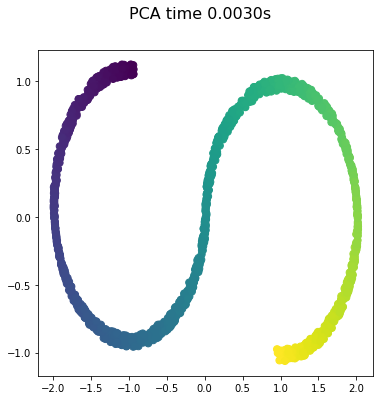

In [57]:
#pca
t0=time()
pca=decomposition.PCA(n_components=2)#降到几维
S_pca=pca.fit_transform(S_points)
plot_2D(S_pca,S_colors,'PCA time %.4fs'%(time()-t0))


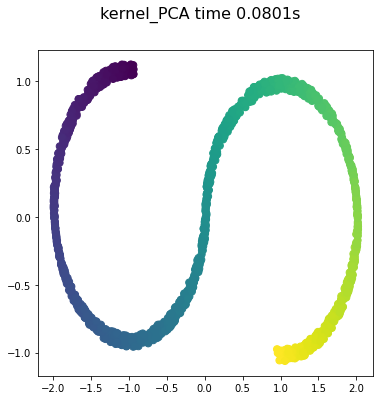

In [58]:
#kernel_pca
t0=time()
kernel_pca=decomposition.KernelPCA(n_components=2)#降到几维
S_kernel_pca=kernel_pca.fit_transform(S_points)
plot_2D(S_kernel_pca,S_colors,'kernel_PCA time %.4fs'%(time()-t0))

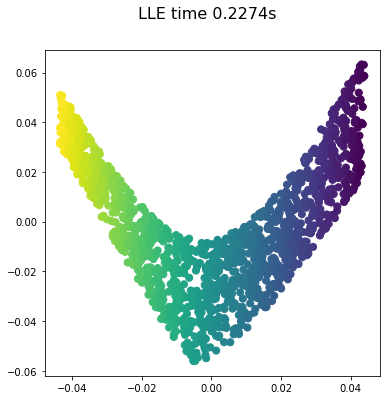

In [59]:
# LLE
t0=time()

LLE=manifold.LocallyLinearEmbedding(n_components=2,n_neighbors=20)
S_LLE=LLE.fit_transform(S_points)
plot_2D(S_LLE,S_colors,"LLE time %.4fs" %(time()-t0))

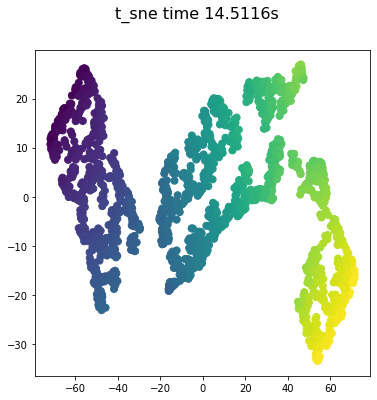

In [60]:
# t-sne
tsme=manifold.TSNE(
    n_components=2,init='pca'
)
S_tsne=tsme.fit_transform(S_points)
plot_2D(S_tsne,S_colors,"t_sne time %.4fs" %(time()-t0))

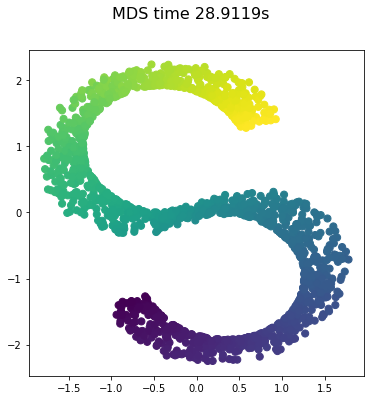

In [61]:
# MDS
t0=time()
MDS=manifold.MDS(n_components=2)
S_MDS=MDS.fit_transform(S_points)
plot_2D(S_MDS,S_colors,"MDS time %.4fs" %(time()-t0))

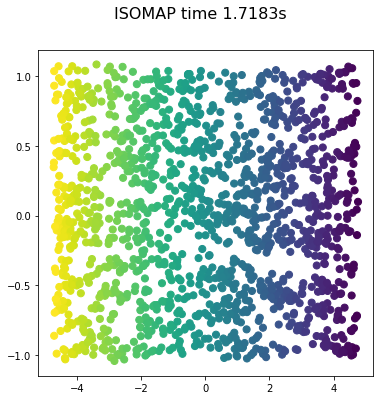

In [65]:
# ISOMAP
t0=time()
ISOMAP=manifold.Isomap(n_components=2,n_neighbors=20)
S_ISOMAP=ISOMAP.fit_transform(S_points)
plot_2D(S_ISOMAP,S_colors,"ISOMAP time %.4fs" %(time()-t0))
